In [17]:
from PIL import Image, ImageFilter, ImageSequence
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np
import os, sys
im = Image.open("./images/garjoka.png")

In [9]:
print(im.format, im.size, im.mode)
print(np.asarray(im))

PNG (480, 960) RGBA
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]
  ...
  [250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]]

 [[250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]
  ...
  [250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]]

 [[250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]
  ...
  [250 250 250 255]
  [250 250 250 255]
  [250 250 250 255]]]


In [5]:

im.show()

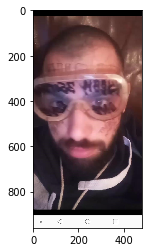

In [10]:
imshow(np.asarray(im))

In [18]:
##NI STAA
#ТРЕБЕ ДА ГО НАПРАВИМЕ НА РГБ ЗА ДА СЕ КОНВЕРТНЕ БАТЕНЦЕ
infile = "./images/garjoka.png"
f, e = os.path.splitext(infile)
print(f, e)
outfile = f + ".jpg"
if infile != outfile:
    try:
        with Image.open(infile) as im:
            im.save(outfile)
    except IOError:
        print("cannot convert", infile)

./images/garjoka .png
cannot convert ./images/garjoka.png


In [17]:
#NI STAA
infile = "./images/garjoka.png"
size = (128, 128)
outfile = os.path.splitext(infile)[0] + ".thumbnail"
if infile != outfile:
    try:
        with Image.open(infile) as im:
            im.thumbnail(size)
            im.save(outfile, "JPEG")
    except IOError:
        print("cannot create thumbnail for", infile)

cannot create thumbnail for ./images/garjoka.png


In [24]:
im_rgb = im.convert("RGB")

In [25]:
im_rgb.save("garjoka.jpg")

In [27]:
im_rgb.thumbnail(size)
im_rgb.save("garjoka.thumbnail", "JPEG")

In [61]:
box = im.crop((0, 40, 50, 60))

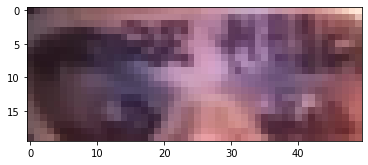

In [62]:
imshow(np.asarray(box))

In [67]:
im_r, im_g, im_b = im_rgb.split()

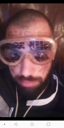

In [74]:
Image.merge("RGB", (im_r, im_g, im_b))

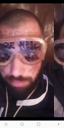

In [82]:
def roll(image, delta):
    """Roll an image sideways."""
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))

    return image
roll(im, 50)#inplace

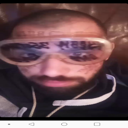

In [88]:
resized = im.resize((128, 128))
resized

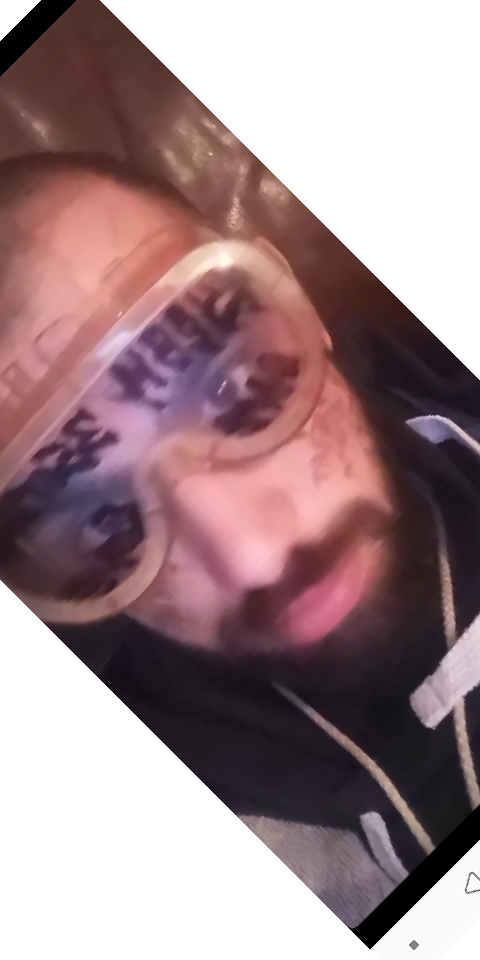

In [91]:
rotated = im.rotate(45) # degrees counter-clockwise
rotated

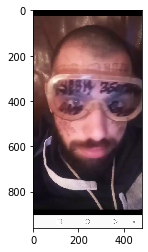

In [94]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
imshow(np.asarray(out))

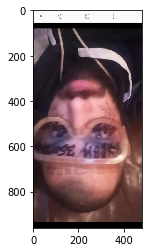

In [95]:
out = im.transpose(Image.FLIP_TOP_BOTTOM)
imshow(np.asarray(out))


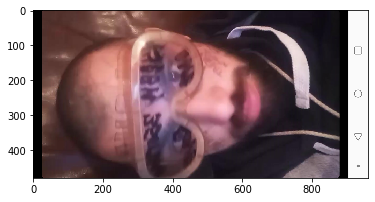

In [96]:
out = im.transpose(Image.ROTATE_90)
imshow(np.asarray(out))
#usw
im.transpose(Image.ROTATE_180)
im.transpose(Image.ROTATE_270)

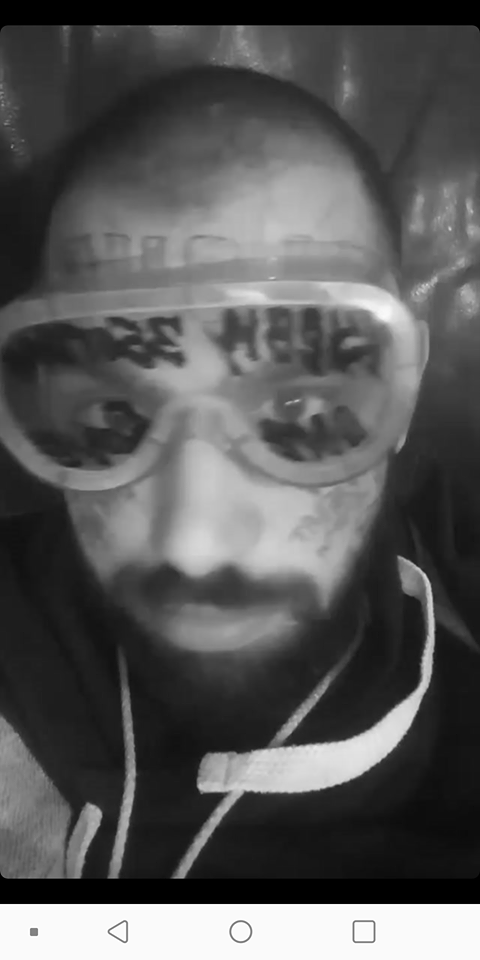

In [97]:
im.convert("L")

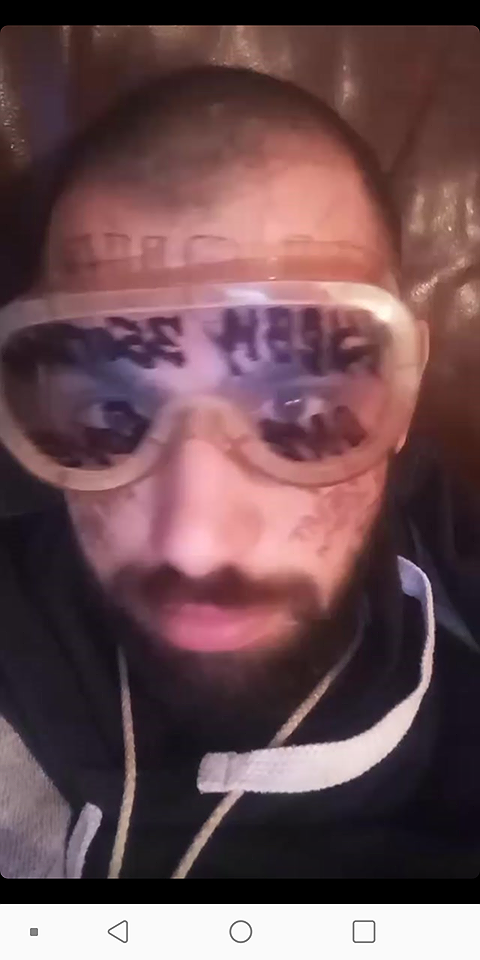

In [103]:
im.filter(ImageFilter.DETAIL)
#np.asarray(im.filter(ImageFilter.DETAIL)).all() == np.asarray(im).all()

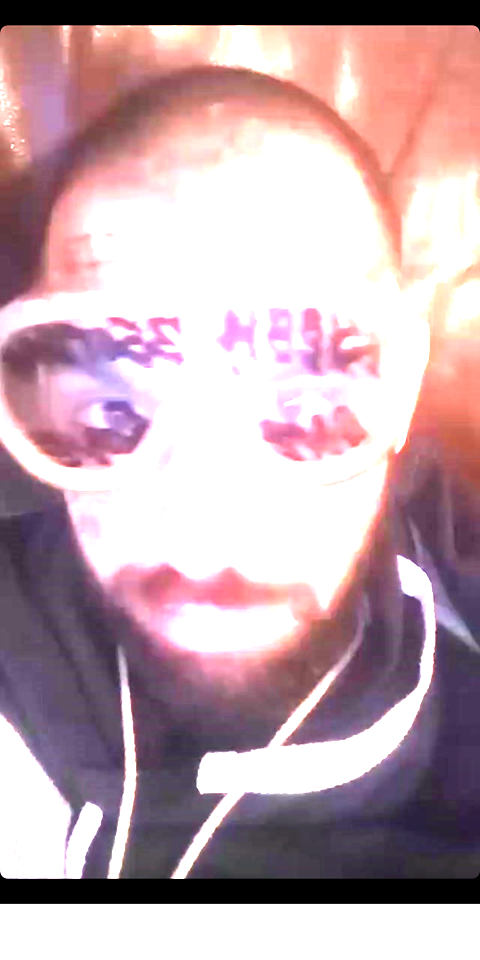

In [108]:
im.point(lambda i: i * 3)

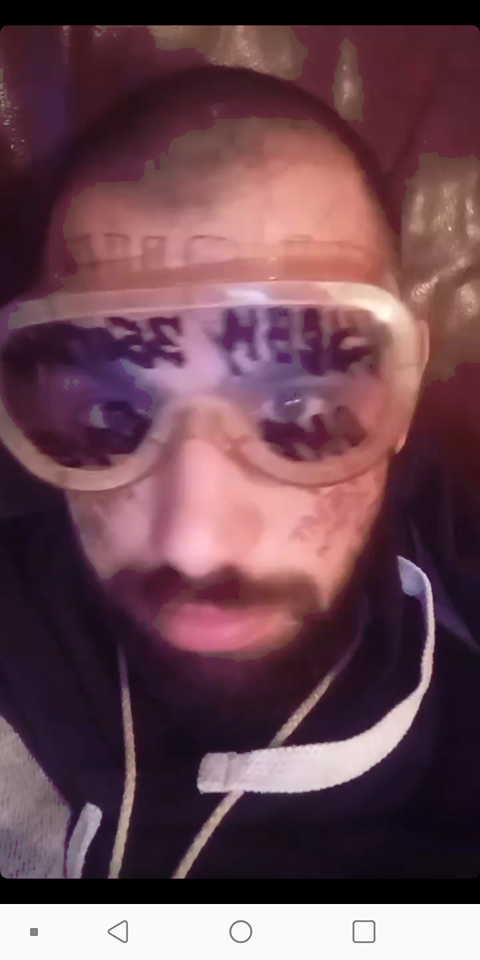

In [110]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
Image.merge(im.mode, source)



In [115]:
#######SESSSSE
20 < 100 and 255
######

255

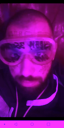

In [112]:
source = im_rgb.split()




R = source[0].point(lambda i: i* 1)

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAACACAIAAAA04/g9AAAydElEQVR4nO28W5BlaXYW9n3rv+y9zzmZpzLr2tWXUff0XGEGWaPRCCFhrkaEAj9gmwfbYcImcBjz7hf8YIcfIIz9gu1HCBvswHZgA5aNIpCQbxKDkIQGNDPS3PpS3VVdVVmVmSfznLPP3vtfa/nhP6e6RwHMRBBh+4E/ojuyMvc5+7+sf12/bwH/fPzz8c80+Eq4s+AcNEM4/FIT0q348tau1noulIWczmVZfGcoAB3u0IzmONzOTIQRUIyj9ZOPkxcHWzlOzMeyjOSVPu+9H310wN0UqnB3OMyB+m0ECTGow9zrNLz+57D6M0GHAzA3UAhe2nX8TPqkQw2mANACAKaG6V782FofryBkuBffWMhy9GuD7mztsMickG7F107DTVKBUmzs/Wq0YfLJkRfhpJF4N74WXNd2eanna9uAcJfRd4MP5mZQhyvM3COzMEy+My8GqxMF4G6GUv8hoMEBM3cyACg+xchYHABtv/2BQPG4tWH0olBxrG1VfCjeG1ShAjrEoOf6RKERZijqo0HNFbDA+m519yxL2pYM9ZWgEAEOhxqKu9bJBSCABhgMXl7susMOzwQD6oIdTjcADo2BuXgRBEFwCAAiOGTw3jABBnDwa/XBoQoFkNkZCGCw8RpXkTDX4iMZAlJkbJAFaJkBFYRZuDH4bsDoABkFYcII0lwV5lBCEkNi6z4qFDBArR6CG6E8iJQBBiVkfwEgMSFP7M0hCIdDAEED1YNDHJh8VKjDDCACMBkgDqW61R2su8JIn7FrZBEYMtpi/RarxK6Txc56hzcy663fcK2uh7cJQSImdgN7eHB4FZX6gwPCIAjqWlcbGAkxV4fGLPNBtw4jhAhAXS0md4U4okPNrcqlw4SpeFIfA0096H4/CLj65LjsrRu8n8tSBebnSVa34iuZ806GwXuD1/tnXszV97czZekic91UkuI0gKCAL6TDoIQDdf8tkHTGht2WWTHSSQRHBBykQg2KvdiVvTgC8CCkI5iPE0qVV/ViUPXJ4AKgUJDIQCIgnITb9+PtI7nh7oFh533x0fHivBEYMtvISJDgfhn7/QrRUffIAMIcVC88bHQEQIAgKfTwQrbcYQ5zDzy8x+HME7K6Al4wuqvthdXcIRSAgkBAIUAV42lbHjwq7zRoj2RxEm4kBAcc+uLVgpCQFzze8HLiUHysYgwEhxoRfP88IHU69SYQjDO5cW3PxBEwA+EIcAHMMOheovYrcIrBHV5QzCfFaO6A1e0JTMIge1FkQHA6AUcCJnMtmC7s/NqeZUjL2TycZDbiDgRhmMnRvfT6lZ2vbYXvGgLAieJqKASFiQjmWs8wZrYdl8a1eSIUCM4EmGN0mCPBA1kXXdSnCWNxdShAgZBBEASMDAKGqishUk8VgRAggOr7bTN1vfb1tvRzOV7IIiIEBFBG3wismkXDh+q/qomqo8lcxUwYHHT3SIZGusGH0etOiyMAgcjYW0HA4YDCRgyTo+xnH+pOR4YMBEAIgRAxshXwhUIwqAFEIRSAQg2TetnYavL+SI5aLIpPj8vbW7sEStWbUk2+GwCDuyv2N0QOAiYg4uQ7r0oEPZH9w7Pzjxhzd+jo/YjREOrshSEiZYQIJGZhTJCIGNkehRvmOvnWXOsqHEpkQAFRTnBXavGx+O5KzwPbIzuFj8Unh7n74R4DDHXvjUhoyegQgx3WgDjYFoBiR4xAANILY1CfUKh5UYyTq5N19okpImaGhikjZDZkFiAhBEqAB3hgdkDIwCCuurevMESnAyg+DR4G213qw8S8kGU1lCTr3ajbB6hBBSFKw2qsXA9iYZGkmqqXg/4xAg6CCd4ah+LDhJ164d6Khao0GjaRiAwN2xZdZCBJiIAEAzNBoWTmRrK4FR/Mp7ojxQdBcGLwvMZ669tn5cEoN2eysIOiJwnA3d2NYGQO+xtFp1QXA5B4UR4mdoGx7NfggAIw3ymmycfRe3UFq0ERMkTEwJzYJlpiTsyZOTFHRMLr7AUCIMI6yRmNEMK26iiHFR+tmg50DXLreWWX1/bcoQ077t2iuqGotjIyCwIAgbtPAAg1aNzaaiEhsyvsJ6/uxqg+jb4dbD2iV7e6J4E5QBJiYo5MDWPD0LBr2TZ1AQzcX24hUHwXmTKahJDgc84aJkKJAGDwXr036BGbC83uem7na7t08cym3gEAhsm8JDYROTA5DK5GAAguBGLv2xlOAhL3elOLl8F3O99M3iso7KpWikwBISFn5khkhoZtwzazScyJKSLI3nSoQDI77PUSIkIjbcMYoAmJYPHo3ji8975BEDjgl37V25Vx0UhXT0BRSAYmUvY3m04PezF3xGK7KzxbhlsEzHXEOLkPvht8NEAgATkzJSKCkSkxR4SI0LBpOU+Msnei9odePfjIOJMFXSNDBDIkwhKQkSMC6BEZzIQnj5kxEZFBi17Y1Q7r6CmzU6j6FJAyu4h8MMCMTFW6DBYdrhi3flU89F4GV4Ud/D5khsiQGVtKQMjssjQRKTF3nBFOaEAIEDqc5kAkAGamlu2cTWJwlASds70hN4XiPgImhEHVx8yucZkxzJg2drHxXYEWHxvO6qXP7AJj9UAdU3VIHSQCKLFgch+KYoCODkNwh2Gkl0g25Iy5YZsYAmNEjqgnkCOTY6IzMmd2CVHoAs1gZOi4nMviSBYBCh8zQ8s84yJQIkJgiKBBRx8m70fv1cfE8Gq8e+Hlwq4KphHD5GNkruooIAQKEWuMQQZBAiyOUNjo0AmTIAMJoHsJsI7tnHkm84ZdRA5klRZhEFBgiZkMASExt2wSINCWuZPjjouWuWVMlAaMEIcltguZZWZBVRfauk7eTz4WjB2PHHJmu43vRh/XtgqIDbvEtuN8zg70gBiZqyrL7BQlqsN8VBggNd5zODElSse4lGXHpmVO7BwqCAERRIAkhIhMBCEaoAUatpmxYU5sM2OW2HIxY5sAwgSykKNO5oKJUN17sioM4rvouQndhOFUlh2eDxjdrZUckRObuSznsjCfsuRjOQG51WsgrO0iTq4OOISgAQJ19whZcHFDTo7lxoK5YyuMAAQizNUPIUKNEIIjChvmjBAhASEituxmzDMuZtI1DAGB8JZdZkOMjtFRiCBQgRA2Ae5hJsvb4d5JeL7VfvTp4Nf4XBbLcHNn1600d9Jra1sNtlafDEMscIIOOAKBCAVKy9mJ3DyVkxmbGbuFzFvkg3ERR1DQ9269A5N4cLrRFAY0SdpOjufSzDhv2TXMAhpUWL15ARJrkoSlOlt0EGjQ3I237pSja322wk6gTm+Y76fXM+MTvwwMk081Z3Aj3t1N61ijfQPlkBcK4FE4XkibwY7pWLo5u8RAhMBIoLgWBhwia/UYGFouOlkQnhjncnQUjo7kuOUsIgQIMNVgkAyCGnXQ6Qp3nxwSmABE6JJHd+O9Z3bZ62hexLngspNlb8+8igA0IBj0VnxtbatYQ/W6nXA1oGXuuEyIiaFhbphaxhpWZ3aRCSAgBXSIIDg0MM/kqJNjARzWyXwmx50sI2J1f90tSQ6owYMDIwmFqlNdhazhuHlMzEdcHMvRytYb3wilkYVhHH0dwEW4ESWPOqjrztYtF3EfVbHGPQA8MSUyMESmiJiQM9vAaL63r4lNQHJGh9ebEJlnsgxIJCJiI4uWcyIQ2HsW9Mwcke0QSQbAfXL3SAECoA6ZCCEW0p3K4jmbrfcBeSZHDZsds0s3l+Xo28E3gG3tgmBUGFENgwqCwObMmRIo1eknKYwR2ajCEJkbzhMbYa5eDSmJjSAEhsz5foWUsPdthSQ8JnaZnflUMNINMIdFEmAB4Pt4OiC07BY8XrLbYBWgDTORgOQYLvVpywURDHoaX02cRbJGwOoAwQBEZoLqOmG3UTXbtqmNTFtbZXbm2sRZYO5tXa/BUbjZcuHQnW23ft3KIrEJDHNZNnu31FDdYEyTb7d+rr4pPmakhlk50qA+KRxwQSA8Mcxl3nnbIG7t8sH4D4sPIIhoxOB9YnutZzO5HVHzKFBAHE7GyAhIwVScSkyICkR2rUwN54EhMAFevG9ksbXtEYIg9752cBlewj5Z65NtwYFsHOpedjYWcmOXa30SAIMqZAQNg/puZ9e+Ty6BQAY7mUXNJIqPO1srxlaOADFH5sLoV/rsojyO2Ht2rKm7iByQHWauRifbwG5wdSCxa2VRr3JALD6qrQLmwk4ho43CENhlZoEEmsDNd4oirsBUfHJHgM7YCVC8BCgwmpsgREZzLdCd95P3gaFF6NhMNRcNJHQZnZoKreMiiGxstbbzKBQH3OFUAoE1ByGKMvjUQjP0Ws9bsGVrrpHZgYBYUDJSZIwIkUEYDGXyrfkgYIAAu52fByBRhDEzNWg29mSn14AadgIXsAZo6kowMRNWfKc+AtJKC6dDBTEx1yii+K4RuRM/9niaLnzaJ7ac1donOZgChe28by0LbQLmjJASMSW04qHh3N2EwVEGuwRGtevR+1HPHVNNcQe4YAxAKzNh2jEIbLDng63g6hyD18jEzccap/f7bPuoXoTMbArKZGsyGNrifZb5XG62PNra5Vl5+8rOYg3cBIGwAEZIRG7YKZzQyNzKvEHO7ATZHYpNbzpi67BJR6Fc6VlkFAeByPQipCSjgKxJWoxAQ6aCaMgkiOgogroGEk5g8t3gfW9bIBzJrYl5Ks8HDOLZsTsKt27GVwA514ePp2+t7UqQ6gIgYEDIzB07ARyakRNDRKKbEAp1qAPmqt5HTkSqEU9iJ0gkhRLQZFlmzgODIwQ2gpQ5q+F/wpjl1GuRxbeARekSU/FRMU0+FOthZzt9MNmuleUNzM51lRHmsjyNH7uf3nxcvvV0eq/3S4PeS68TiAAJEN4yH8tJx65e58gms8ZiTctF5DxJjmBASuwSM0kiRYaILrIx18CUZBF4Q9g1cjILndREF1EcW4XqxpEgoE/CnJg6udGFZQgyOtSNIgQmn56O3z6fvgW96OQ4sPlE88WX86ffGn7tvfGr5kjMn+5+7GZ49b3pqxHwjHwSbh7J8ZHMWuaZzJdyupBZQsgIDdOMszrpgGpy9p5FZA7IkRkQRU924HLC3D0U0xgxC2iJVmDACKxtTh/dh+AS2dJ1recbO1/y9SSSRSgA0CLN42desc88Gt6+tGsAMzl6OH39wfTV4iMRWrl9JLeW8c7GXo1LOb2f3rwVXjqWxUzmAit+PeeiZUMoIIZYAELdXRC8ZsPRRjRgJ2wF0YHEWWTbyW1iYQhGrBVXBhLuyIQDg8PRJgiI0VaTbwJ1Id1qOssyX8RFJ5gHiGByONCF1xX/8rf7n31avrWzzc4uHRqQAsOVngmjM8RPtF86ktOEkNkKQkAGC8DAHIAAETRgl7hIDJFt4lGAEAhsAKh7AQbvBVGIyXcCFvhTffyb49fncvM43L/QJ7fjaxs9ezB+ZfL+NBy/FO88Gr92Vr79crr3yfwp9c1ClqQniYtw683Zj9+fAYQDH29f2+pv+1b/f/Z26T7W8oxA1naerNvYVZzJMiIFxkNCl+7NxvvBryNiw5wQZwLH+N7wrWfl4TzcvBtfvxFu9bp6b/r66FNkIvC59vfdjK/v3B2lwJ7r+cPxm0m6l1O51lXDY0Ea3Qm5to3o2ZmdX9i6KWc35cbGnt4ML01+mZiDPFjpSvFTdxsUgwAv58+cjV8z29bCXmAWhI1dbMaLna1jTU6MPqztbGuXa72YfBh9U4AZT+/G15bhXqOryDA6otxe6cWD6edfSp+ZcfagPDoOd5e8udZ31XUuNwYbL+2SzEQ06Naun0zfMch9hLksCZJmkOLqQGAswA5h69Okj923IJZ4aTN+89nl+Sv5E59of7QTRIaX0xsLNGt71ttgrqP3O9+MvlWformf2wer8qimBnrfFihBR+jt+cquG3k/Y+YoN8O9z7c/Dth749fP9XyRX76dPrXV8/vpUx7vJx4RKRPm03M9e1YeA4CHta0aLhpZnJV3rvXcMSzCLHCZOVuEu6Ovn9rqyq43+uSGLE7D7Y1tJ/Qru9z5eSvppfR6wBQpztGBgoneD1bc1WAGxCs9e67vrfW8+CgM5mpwYQ5Ii3ADyKNrIBzhiT75cv9z5oP5ruX8UXlnsm1vq28MX/7h9vfeT58KyIH5JLz6WJ8/08eOcCPcz7IcbRPQRC6O48uttMUuOjmdh83VdGauG+uf6/mp3Pqh2e/r2D3VB0/LN+G7XrEqDxcym7E1H91doZNtjcG4ry4TEs/KO2s7Vy8FE0wBAekeQHOELEu1vsCBYLCn+hTAq/HN2+Glx9Nbva9vh1fu589OmHrfLsI8AFG6j/NLW58eTt96o/mR4/DSN3a/IMz30mee61PBpGxXel7cHXnn641tJw+F+RvDV6/tbPJroF+G263cBww2qIhi8pr0q/UKd98XIBHXdr6z9aEmgMCaa9DJ9crWR5gHpuImbNxDKyednF7axdq+LsBxuNOwe3/8zbdt0zfDrcVPNoIE3Ka80XwxcfFK/lQkOjm+0rM7aRkY3xu/ERjmwkt9fGWrgDJBFXw4PXwfv5GAm/FuxxmBjrPg7j6ax+KqmAaMhnjInJeaFYiRAtQTkcRuJkfFR2HnCEBSmCBH5iTzzOVxeOkkvAYfVuWbW33+avrs55sfV9++N36lkaMaGkbCiDuxe1rmD8dvfrz55Ge7Hz/XZ0/Lu8L2KNxTTCQEz4trIMEgTOZYyMlL8eWEuPOzhFlCgmvvV2o6AStbX9sGTIBMGCbva207duxGrgsUCJn5RrhbfBc5zzwC5oameJn2aJKgXgbb3gi3X+7+0DGP7oR7t4Nk4tPtmwJU3Irs0yZoOfvO+JXAbh5OJx83dqHQVo5G3yo2R+HUME5+MefyJJ3u9Lyl3gr3xKdVuZwjRNTaokTmzPlzfb6xnpwLTYHRR6sLaNh1MqsYmcTcsJlx1nDZyS3hwhBGt41td9ip73o7d5hhbGAn6YbDJ0dDdLIPGYvXkijWipbtG80XN7buy4PiZbDtztc1JdjIcs7wavq0o0/wBmMJq9HPZohJZjfSGxGD+RZYtugyuh02q3IxuAIbeigogLFGYJE5IlXrEJjcVZiFIqiOiQaykyP6onB0t9G3vV2s2OjYX8rilfDqFG8ToSUIuKMYNoZrfQz0CYzQAlXsIkOLrmBHBIcO3mcgYqcYBl8HHzs2M0gmk5w0MGCADztf08NKz1b6tPgISEW0+B76ITEzRkaD1Cqvwx1uPg5YwYvCCtzRCRaJXS2ZFC+X+nTHvLOOvh38zP2lZbjV7Otyar6KWEWfHNpipGvNwhfYta0KxgA/lqZlq37d27Pkw0KaxkMgEsIMMVEmlOL9zi4m798fv3blqwmTIO2LpxUXRYvHstzq8wlGJFanDWaw4kMF56gLGQuuVuVywhgQl+FuwyPDNPju2qYT6QzbYmdJupZdlNDI0cx5pasLfW7sAY3IOdx9ps+u9fHNeK+TVjC+mT5tWL2z+4WdnREuVIE2aDuKYjLfubPYtaI/10db3ylEfMJ+AU6QHuJCTjt5WmxNUByEkloDfPW+QDOXJ/Heta3PprcUu9E9YLwVPhcBgc5lPpPZZFcXeLSzVsLNzOAoc+RGWjoFGC0FnszCvY2tIsbr8vaFr1/Jn1qG5WDbI5mv9f0Pytt3wuki3mokBqJ4T7jDJ9sU6PNyNh5qLtwvAGQIkJjYLcOd0foJ7qBCxYtABTBoQDOTWcdOJJ2Em8XHwbc7O3s0/qOb8d6dcHspR45+pWfmq7vhHpmV2tt5lNzJnRvSAcOVj70/ezytFMiSrvR5J81JuPWbu59/b/jykSx2dgXoWp+uKXfDHaIU7wMSAfdyoc+e6XOr9XoYoHUN4uL0GJlOwm21/tLOFTCMxTExRmT1wdFvVCPaJDeztDtdR8bIxZU9nqaL++Fmxxygkw8BpWUQqmOsaKPgQyvxGE2v63enb39r+rYyB4StrYEbK31wNv3GB9Nv3owvNcziKNid66PbenokCyIkZiBM0EtbbX1nLhXYZwcAl8ANGhObhjGkl3fj9kLPAXPI5FMjc3hQ6DN963F5N3CmLmReyHJymK9P45278f5M8mSXg69mVGAIUPMpQugwXyfMGqS5NK1w8vVKNxUxcq3vbfX9GWcE1vrYZC4+KiZ4eXf86v30A3M5AqA+we2pXa8dDnU3gxq1YhFARmecfFjK0Szc0thv7OxS14RN7Ac/imgriqrYqnAT0JGLte1GX8/YvB4/viDd11t7or5reTLjYsaFIgS4+rTWc+J88qmV5Z14e87mAufqaBgS0mhr5aaWRovvOqTR16PvFgyj9y06dR28Pw73nuvFDomAcqIr3R2TA3RRIr41fv3z7ZdmnL2RP0v613a/vPXR3EasC8aE1h2kBUBYxHuDJ/c329/xev5tGeOz8tZOLxayuBlfeil9Ysk5MK31+bU9K95f6dlJuN/Kci4nmMsv9b94pmfq40m42bG71MeK0rLJzEc8TlwKdvfjywvOI+OVXW59PNeHT/SxYkGgwIAcUACrCUx3xLendzLzj7Q/kpheS2+KT2+N37iw3hAiU0B2aoN5QFyG0xnahvk43Pl480MncgzfXdv75qVF13EekMEmszth50XP9a3BL3ufZz9N0ryePkEPXxv+3jvTt0Y9v5M+O4/tSh+chptEWaB7Ob3SSRCou/Z2/aQ8fKDPPtDtFUQrXBRwwjxU4KEAAOPg42+OX2/YfLH5oaXcnDVfOAm3HkzfeVzOr2xbiNvhZQDX+qyFfLr59L1w72Z8NTCPblf6vPi6Ye5k3vEosY2URAjTaXy5oH/ff/2ivGeIS76WmN7Ir98Oy4fT60/Ku4mlk+XL4dOn4VYnhI8V9enw3rfFN4bwUM8vvRREhxafDEX2YYA54E5Co0N7L18ZfjUAX2y/2LG9l948DS9d6uXWd4BndgTM35jL4uX48ZNwO7ObfLfSs7U+SkAjXWIn6ARZsC/bJ3a34qcimwfDr13pB72tj+PLLRfLcHQcfvANe7P4VjEREKjAi/W9X4zWq4+RaSHHk50NEEM0yAQYfHIlrKWwBgdQQGuVhYOXfzB8ZWVnP9R88Xa4A8hcmlfDG3M5FsaAIMwJkjlreLzz9bPywdbWczkp3gfEiOCHFGG1lE4QeRl+4LVGnkxvb71f6eOe806aWuVNyAKb0E82Elp8GOwarifxXidHZ+XtjW7VaRAFikPdRjchIuiQAIYa0OgBObT24TfGB4/K6rV46/X42p1wJzAH5sgckbPMOnaD9U/Ld6511fDkZn7zWh+vyxNBiogVXFJ96YOehjDfjC+3nPW+3tkweL+284pTce8rGNBRxNGwWcrtyLgMtxWjIax83CEVjASBUVEmjAHBkA3F4IoUIBHgAdFoCr201dV4+W559Hp68zPWH0vXSnWWAdfiKuBC7t1JrxtwhWgIAgKyxy0DB18FAQYoEI/D7WPcLlCHT64KHexqrY/Py1sJ4TTc29r5ZH1kVow7X0emyXVl6xEoiIoy+jj5COyhcwaDo8JXIz4yFGqAIFzb8Lic3ZO7o28bCwEk0GJ+HO4dyWlgp64Ocq8QBCBhAnUPug9bQQzqk0OETWKqjmQkFNrx6Ea4eyfeW5UPRlsPtlEvAAt2ANTLUz3b+qjQyXXwcfTRAIcAwQlz0RqbIUdhcPcDNM8BGGSEXtjlgLyUI3Gdy5xgRJrL6TLcm8lNh+ysd6h5EQbZOxGTfQSAra6jbx2A98pZI/PqBhMgBR4jOgCBMTARIkwRUIzPytMntt34Tt1HH0c3RfXzEbCHcwMVNl4BBAzqpg6DEXv07g67K7868SN3HXxayu3E3MgycRnZCnNxNahiysittC27F6XyGms4JvWpwvInmYJnMgFSYXmjD5MP7lZ87GQ52oYIwriz4cIunujjHYoi6h6zXb9WFcEqMH1/zhq3tjKvJcoWe5w4CBQvz8vjm7LMPhbdCtLL6VMzOU1siBARE5tig0Badi0XSY6DpEQIMTnMR7gGiFVkko0Th8wUCIdMpqvyaLTnRInM6oNizJzvvF/b+SP94AN7toMpvB5RPeq673BxSHEX0gGZfFCUyv3AnuZRYfrh0s6vrXe2hlh85257rA0DKQQIiwgdFzPeyOwykQWRCIRjcnhgrGCrREnMcgg7r/U8Mc3l6CjcaJmBsZN5K7OdXT3RR+/p2dV+uhVoLA07h7mbw0FWNL25WwV/Hw7d44HIAkCQeu93XhreCBgC0+D96JvOZwYtGAffqo+ReS7Lo3DaCrIgCgioQtA6+rpg0AW5k1xNaO9q6BMtyQLuA/qZnAbGnQ/CfOXDM1tXZeU1JIAldoK10/c0mvpbmKPEPWgETlgF1h2qzTr5sLJnBa/NZZEZJt8OPuy8Vyjce7sCJDG3sqygOjnES5FIEszmFSEWMGvlpCZdFMgSbvE19Q297HBVUFp2JAe73GI8s4uV73a+UwTsMdtqQOC8+Mr36bmqb0ggBib1CkQrwARUYHd0WnG70KeDbxq5EekgB99d2yWrjjFNbAIzGCpku8IH6h5EYmIzmQKeZBEPDxCIrJD4uWOzLpeGKclysN2T8uDr49cflMdbHycokDOyg71fuqOR5aA7hRo8VIgDQOw5B/WrCVRFFIQBkEK98tWj8u7tcDrDwuEbe77FZfEdHA07h6utoz5c6kudpAiUugzDzjaDXhLWykJI/RCEvnfHBDCEWbjRegRk69fP9Mk3y3tPbSguhgzoTJZfmv/b706//hu7/1uAht3Orw2sILeKu6pqNFnldX2oA1Frkr3v3td3bpeb8/RJuG704tqejz4mdi079elCn3LgM33nC/hDL8dTEsXxfPrOO+NXnpdvn4Z7b+TP3cL9Vm6A2b0M2Pge9RICmNhO3u98vdInz/XsTM+ufTd65TzIhClw/geO/swnm1/5O9f/5YhJME6uYIhsqvMSq+jKHj/mlZDm8Be35Eov35m+PZNlAJ6XB2s7DwgZwVB6W/feG6bLzYNrPfsX2t/byexC331n/MqT6dsrPZuH5bmdvWmfPQn3RgzFe3OdMKpPifk03D6WE8e4tcvn+vgDfbzxfvIyYqrWavRh9LG38nL64Z9a/of/8+WfKVZ6X7uXtAceSpS9PBGQWnx/QU852I7pmZ2/NX1rzm6rzw0QeI/rwVbqI2kRMvn4G8MvfVDenslij1m2i52Pa32sQ3+hj5dyTFhgCggjpsF7AKfh3sfz5+bSPSmPvjN96109W7uOPk6uQA7k5OPaLiLzw/L2a/mTv6P7g1/e/o+oBAYPwnoH9qjMpD6RQghZ/+TuDtjo5dpWj8qDE7nhPiamBC0+Ta5hb9Fyw7ljWtkH1xaLq/pIDA4V12u7mKbdM+YINBIEqbobBDc6BHR34623y7vfnh4/1fXgaggVwhQgDvugfPtVeza6nk3vfbL5wV/pfzpyPdhktIq02LvBAdFpDjoMHkDBngriCite1nZFsGUOyEKJSFkauGfEGbsZu4jgKKOP5lp8EGrcK1VX6OBjgZohMAvn5gCpfvVcn4L+1vTgfT1beW+eAjtg4/vEQ3h3/PsX+h/fCK99uvnS6/luRG54XDii5oh8r9MASvB0cDys1oMBOMygE1wcvW8BROTMNrMJjG5jx3wiJ0fsjrnM7CbfANja6trOjCqQCMykadgGWKAHNhNCb/2Acevbp3a+VTwsj1a2Lu6KSDbBJ8XooAHu/fvjlz/AV+6Fe8ftx+dyrIaB60o8wQtLXGk18GD7GjMEgRR3Uy9GEqCtJ+4K+8jQyrJFdhkXbI84u8HlvXB/waMEmclCfby0Z72vFCPhbYWfV2oWm3NdXduDjW93tlv7Y9Wzp7ZeQycouYfLVNJmABxFQPXpyh5FNvNwR9kpypU+quy2D+MB7kETwaDqGplZCWWAuxcoOAW34io4a5mDHHdoZ2yWXNyW20ectcwBiI4GzUxeU/aKMVAiaT6CmqQdQcfTp3a+LmfXvhrscgvd2GbnWsAAI6TAp0rCgKhPihFMaz2LDAHecLYMrwzYrfWM8O8KaITi7tj7dsq9c0rzUvZmFAZs/Pq5PjVII6dk6uT4ONw6ldsJISBEMDBF5obRWCbfTL419iJU6LVdOywgF4QrH9a+2XnlwFYaFCYfK2ORXgInhxqcmLa+AvxS39shLMKtU7w22HbwdcW01zzRXpDco6Koa2QMiIr0gsXrBCEFdmVXDopPXbirABEiY0KbmRNC3PNSYu+XOx9JE3Cw9bVfP9Gzx/bkkZ5d2Xrr0+BeXA41UwakySetOXRaJVs61EBDMR+3dv5Mz0c/vxFePom3n07r7zqB6mAEBt9T3bKQFexpbg41hEAa0GM0uxSEiNABR+yOkKMcATYhGKbimy1QsB596L2/ssfXfnFl10/s2ZmdP7H1ytY79wGV2JvolpizzDb6nJAXnGiHATTXG+HeQpaV1nxRHvR2fRxuLuQoYh9G1UPY123CHoQ0ijcBISAYJoMGxobd5D3cC8atr5+bTL5e2fr98PCu3Lkpt1pZCMwxmNuEbe9Xvfcrv7729cbXl7Y6t4trH3ofFFYBsEQgcyc3Bh8n3+2DEsDhtk844AfSJ4r3g/dVL6/t2eR9J0eRaIACVNCseSVegpWvaKzORRAm9TEgd7KctHfS3Acf6VeFYeXXD+xhh+5GuDnnMTA5CoGO0aGOcfTxyldru+69X/s0eCnQqh4AkJzJaZLZ8+ktQ4GzOgTVryEkUj7Vfm6tDwefAMDNIDvfjL6LFcAEBIMCkXBgAiQwqE+GSZACeUg3eCfHK/2gUu1GjIYyISQPClPC7XzgSLhDhVx7UAzqo0KvbdV7P3g/+GRAgQfGCm5ouDgO956W94pP3BNWpbpklfTZcHknvt6Xt+CVBKVCAjAv0aCR2fZ/QEXAEiYIIMyVDEQQungwTIlN5fODmUCBmoNAgQux8UKMkQBcPIwoutcq2rv2PhXADt0LCBGEeTh9Jf22J+WDtZ0DIqgaKUSmygiuTG0irG1tL3JOTtBJi+pTpXViz5msQLpaiK3H4pW9V/HfEYGEWqlIQTqVNgGCER6MZm7RIdSIJAiKaee7glIwGdxAMtaoUF0b6b7U/f4P9IPz8shcX6QnawcBhwcmdY1Mmd070zf30SRCnS4ZY2WXCRNB8wpArlHHnt2qrpGVXZjc47Hc6ng84DGgQDDuczUjtHjfIE9QwgXWQAWimHYo5mqAItj+ywNgifFL3U+ehJNf2P7MgAF75RPIJBCH1cusGL/Q/cTd2P767lfJhA/p0oAj1n2t10XouudZvoicPowTgCDAaTi9GW5f6uManjorj6NaPoNPAgVM4DWpr3CDGqZDsqjioyEIX2h/12faz/1v1//ttV0drIEIY0ALwKnuVnz4YveH//St/+iXtl9+e/xGQCiA48DyBvbxgB/2+7eMwFDcDFoTDqR3zKeyfAcEUDCKBzCHQ150gleOT3AoKh73QPTYMwekNpb47e0P/+j8J39x87e+Mb7raJ2T7ckGnTMBcB8T408d/8k/fvonZsTPrf/qgFGxOwSMe4JNTGwVkx6EnjBDpcJW6a/+hTmVCHBz6EKWvicsw1CKA3QgwK2qkAAkBNIU4j7tKQR76hADyqeaL/zk4l//av/lX+p/iXuKZ8Dec9nboiM5+jdO/swfO/ldM+Lvbi7eHb9eg8eq5T90f97Mn2+YBaE6d4eITA6Ifxwut1ca7+B9Kwth8P1bWZ0/9dFczSeDKmwEJg+TUyGFLIfUbIG+kj71rxz/iUfTt39289dHZCISkciBLRBqWuyYiz918z/9N09/V0sU4Gev/+u1XR8aHnyXrMQfm/1ewfjN8evFd3umGJO71ZnhsFx3A+l09elmuBGRClA7Ahi0oPJjK0knGsQw1nsF0LyGNSbQO+HOHzn+t4qPf2v91zYeI1vfy/T+44bxbvzYnzz9s//S8as1k/fNHr+8+Ttkdigch1Tp/pbGThY/3P3B3rZvl9+oXqEgGAEE8WrJTSCOXV1G79s5bwegHPZAvUodAgNgdK+1aJLcr98BKHwmR3/46I+fhLt/5eLPP9XNgVdJ7Ps5yInc/uL89//RG3/yt7dVhWBj+KuXf+HCN0Q0NzvcqENHDcZGZgtZ/nD3B88355e6cgRCWTUPUTtsCKke1N0hva07WUTmwcd6Ncve9w7ucNZeHyRAF0KFAYBBI8Knmy9G5v/u4j/71vgNoolskzRzWS7C7WW49dn2x/7FxR94s8Fc9tm1APzN1d//u5uficgTikNqVrQKf70PMTMXG+6mlz6RP/dru79n7vUqA/ripgNSe8g4dG3nQKmOhnyIw6vDDCQqgTrsm1I4Z3J8FG5+LP32H+x+Ar7+wdkf+YmjP30j3Hkpffw4oBPMBEcBC0EEFPvuMAL84mb87y//wujmKA6rDuV+QvsTQiREGNz04/lzD8t7T6b3SYrXGOAFunGvQNxt9D6SAdHdnfRD/4iD3cDvaH73J9vf2cnSfBp9K+Bn2t/92e71m2FfzMlEFKTqHhyMQ1U906G6Y8CX1/1/9ezff16e7vkwMPUKCPtIWwYgjj6aj5FpLrPPNT/S2/pKL0nCq5b0j/jlOLTnacnaumTPsn6hE16Kb/7U8Z/6gfy5lqF3zQwRuJ1wFOptgR9SqBNQDq68HC5KleuN4W9fffMvn//ZZ/rYfVRMBldUDkOtAYgDrIitnfW1iCIMd+P9z7Y/+svbnzMvNV8dGF7kNAlUZv5MjjpZgOcOkCKwqlIN+kr65FJuCkIk4EjAUcCs6nZHcQQcXOT6mwqcOcAdhXgw4i+f/zc/v/4fduYTtGAHd4MpRvXxINUv7KPV9DoBuruQH8+ffzw9eHf89YoeDQiRXU2uOD14yNJldmGvvyu50w46Abfia4ltfYO5pRAagfse3lCnXgH55bDlDrSEA08Kfmnzzt9Y/RffGr6qUHWdMBoUFPNSsFUoalnxI5YgRmaDTl6qMlZffyJ/9lIfP9P3DLW1jdERkAyTQY7ktjBPPuJQbsG+rqMEPpY//3pzu1I2EtONgKYyOA5YzJoNf1EIdMeF4sE4fmX7c7/S/x/fGf6hwYlQfDCM7gbW8GU6sOQNDPjIiHbIAtVMRPE+k6+nT1zr2RZX5ir7fhj1/7oIp4CPPgoqAU0PHoQ47Gv9z5/KrXq4d+Pdpdz7ld35w+ntZXgpSSfwwJDYFB+v7fmj8Rtn5cF3hq88KQ96uwpM1aGYDg2IXqCMdb+/xEe8CAccGiffAajnYLYb7Lp4fxyO7+fX3x2/WjBmLgFRKBwBcjd+bHLb+QiI73vkFCAENhHh1/q//Q92f0dt9/H82X/39D/5+5tf/UsXf+65nidphAEoAhKhYJx8KL4DBFUnMfu+6UeVdTtoJy2+Kz6B7rUTg09kqJ4/iVgbQBUMDjMUAK0sguvH8w+u9OKZPvw9i3/nTnz959d/8cn0nSTd3Xj/mT4efHfwS2o+Z38zjTCfbse7f+zGv+fo/+rlnzu3Z8JscPPBMdbGWAdOa9WixSGOfSqkYGcYq4eimNS9+lfuFfFXC2K6dzcdcS63t3Y5+TjaqK5ZFrUKlNAch/uJi8+2P/YD+dW1PfufLv/8kSzuxtN/sP2KHir9+FC6zAFzE6Y/sPij9+Odv3T+n3+gj4Dg+4BmNFfFhD09dM91dUyOyb3KsAOjH7I4imKHfno4vKLmdGUfD1jc2nrnu6316hMQ3RVkQFb4YFefyF8AMDmelXd3fv2S3F/I7L3ywCACOKaDHte9W+T6I93v/PH5j//01V/5R8PXje7eA7XF22iuBxtU2ZtSIWdWb+M+GQXADVYDnxdGHh/6P/uaat2F+EF5CAihQIFbLfwL4tauM9uP5c85sLbxa/3/pa43wqlieFreK5hYbctHHHSHvxbf/Mmjf/Ur21/439d/e3C6D9W8GrTOyd1IcYD+IveDgyGvrD44GJAMGvatnl5EuS9UNol956J4peeERDLAF3JEIrNrOH+u53fjm4lpISe/vP1fHuu7SfIr+Y3e1itdVVXOFyBUwIEFb/zho38ts/uZ9c9s9ve75gYn7FsPGAmvHeYY9x8DhfTD7A9KpjaBsYDEfSceOIJ/6CspPJCMxWuxIAc2k5eGi4B55Gz0/k56I3HW+/rvrv+agIH5pXj/cXnQ25a0/bbt8xk06GfbL3y++9GfXv3F96eHQjOM+/4XtakefJ/rpu69E+DFFnAvinufpeo3BwBlzZoCcOeevG6oC0eIh0SkTdDRBkemTJOtE+edHM/l9Dd3v3hWHpBhJt1puPnu8JUdeu4pqwHw2j7wZrj7E/Of/PXdL3x5+/PkwTazulxGj743XLrPOB3Ore52rT1jzx6u66tN0vaicqjP761WPSYSMXKmKIRNXiI4YVS7rK8KiJHdd4ZfreC2hdxoOH8wfduAmplxKODqFpC/NPs9N8L8f736G73vnMH2NXPZAxz2aqS+1B2QWg1yAO6ufmjF6S/Sul5bFdRDcBCOUHv8YX8NRBDE4ZkzRzKYMAXk0XsyKCagbOzsSfm2YXToabjV+9Xj8sFH8wJVP76SXv3h7nf/8vbnvjO+pVD10VAOiUE/XJJ9Nu6FoHPfhqpOSg0VcVR8z5x1c68dw3xvg+0AyePhuls81/duhPsKTWwTFyNGhwXE0Yfiu2flwWX5AHDH1DF/ML37pDwy7MG/1clr2H6h+50bO/+Fzc9OmGpIeUCMfOi3OAx4kXTAi232jzzgB+fqRbvOqjbrJSYD9sF3dcBNvbDjciZLwb7Fl/okFEEoPgZGc1/p4yqhR7IM4MrO7UN8lzuQGG+Gu6PvLvT8I9P1j6iU3zIO24ePaLGP/rT3lu23fu67Rm1gpf/UZ/75+H9h8D+4+zf/v57DP9Ogf8G/91P/Px5x+sj8X+QI/rFDgNFxqTgJ+0rO9xznBeq4GSuK7nsMd5wrzEHiNBwai36v8WFCQR3fGTD6P151EDgv+GDCRrG2f5J6+a7vPZuwMwjxcPq+5nFt6A3HARvF9vt4xXctgEBx/NrWdv+ETxJYKVpiGWDfn9ANjpOI04Dp+3veHK1gEdDJ9374w4mNP/Th1/OfLD/1r88KLgruZ8zle4gEgZ3h0QQANyOW4Xs/3xueTGgEveF+Qvu9XvGPWcD3HJX4yu/vdHlw3r+fC4CDFFQbFr5PAfoo2OP7GYbvd/Y4uCz/9FP9Lc8H7psFff/j/wFDFGBOewWbmQAAAABJRU5ErkJggg==G = source[1].point(lambda i: i * 0.2)

B = source[2].point(lambda i: i * 1.5)

# build a new multiband image
Imdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAACACAIAAAA04/g9AAAydElEQVR4nO28W5BlaXYW9n3rv+y9zzmZpzLr2tWXUff0XGEGWaPRCCFhrkaEAj9gmwfbYcImcBjz7hf8YIcfIIz9gu1HCBvswHZgA5aNIpCQbxKDkIQGNDPS3PpS3VVdVVmVmSfznLPP3vtfa/nhP6e6RwHMRBBh+4E/ojuyMvc5+7+sf12/bwH/fPzz8c80+Eq4s+AcNEM4/FIT0q348tau1noulIWczmVZfGcoAB3u0IzmONzOTIQRUIyj9ZOPkxcHWzlOzMeyjOSVPu+9H310wN0UqnB3OMyB+m0ECTGow9zrNLz+57D6M0GHAzA3UAhe2nX8TPqkQw2mANACAKaG6V782FofryBkuBffWMhy9GuD7mztsMickG7F107DTVKBUmzs/Wq0YfLJkRfhpJF4N74WXNd2eanna9uAcJfRd4MP5mZQhyvM3COzMEy+My8GqxMF4G6GUv8hoMEBM3cyACg+xchYHABtv/2BQPG4tWH0olBxrG1VfCjeG1ShAjrEoOf6RKERZijqo0HNFbDA+m519yxL2pYM9ZWgEAEOhxqKu9bJBSCABhgMXl7susMOzwQD6oIdTjcADo2BuXgRBEFwCAAiOGTw3jABBnDwa/XBoQoFkNkZCGCw8RpXkTDX4iMZAlJkbJAFaJkBFYRZuDH4bsDoABkFYcII0lwV5lBCEkNi6z4qFDBArR6CG6E8iJQBBiVkfwEgMSFP7M0hCIdDAEED1YNDHJh8VKjDDCACMBkgDqW61R2su8JIn7FrZBEYMtpi/RarxK6Txc56hzcy663fcK2uh7cJQSImdgN7eHB4FZX6gwPCIAjqWlcbGAkxV4fGLPNBtw4jhAhAXS0md4U4okPNrcqlw4SpeFIfA0096H4/CLj65LjsrRu8n8tSBebnSVa34iuZ806GwXuD1/tnXszV97czZekic91UkuI0gKCAL6TDoIQDdf8tkHTGht2WWTHSSQRHBBykQg2KvdiVvTgC8CCkI5iPE0qVV/ViUPXJ4AKgUJDIQCIgnITb9+PtI7nh7oFh533x0fHivBEYMtvISJDgfhn7/QrRUffIAMIcVC88bHQEQIAgKfTwQrbcYQ5zDzy8x+HME7K6Al4wuqvthdXcIRSAgkBAIUAV42lbHjwq7zRoj2RxEm4kBAcc+uLVgpCQFzze8HLiUHysYgwEhxoRfP88IHU69SYQjDO5cW3PxBEwA+EIcAHMMOheovYrcIrBHV5QzCfFaO6A1e0JTMIge1FkQHA6AUcCJnMtmC7s/NqeZUjL2TycZDbiDgRhmMnRvfT6lZ2vbYXvGgLAieJqKASFiQjmWs8wZrYdl8a1eSIUCM4EmGN0mCPBA1kXXdSnCWNxdShAgZBBEASMDAKGqishUk8VgRAggOr7bTN1vfb1tvRzOV7IIiIEBFBG3wismkXDh+q/qomqo8lcxUwYHHT3SIZGusGH0etOiyMAgcjYW0HA4YDCRgyTo+xnH+pOR4YMBEAIgRAxshXwhUIwqAFEIRSAQg2TetnYavL+SI5aLIpPj8vbW7sEStWbUk2+GwCDuyv2N0QOAiYg4uQ7r0oEPZH9w7Pzjxhzd+jo/YjREOrshSEiZYQIJGZhTJCIGNkehRvmOvnWXOsqHEpkQAFRTnBXavGx+O5KzwPbIzuFj8Unh7n74R4DDHXvjUhoyegQgx3WgDjYFoBiR4xAANILY1CfUKh5UYyTq5N19okpImaGhikjZDZkFiAhBEqAB3hgdkDIwCCuurevMESnAyg+DR4G213qw8S8kGU1lCTr3ajbB6hBBSFKw2qsXA9iYZGkmqqXg/4xAg6CCd4ah+LDhJ164d6Khao0GjaRiAwN2xZdZCBJiIAEAzNBoWTmRrK4FR/Mp7ojxQdBcGLwvMZ669tn5cEoN2eysIOiJwnA3d2NYGQO+xtFp1QXA5B4UR4mdoGx7NfggAIw3ymmycfRe3UFq0ERMkTEwJzYJlpiTsyZOTFHRMLr7AUCIMI6yRmNEMK26iiHFR+tmg50DXLreWWX1/bcoQ077t2iuqGotjIyCwIAgbtPAAg1aNzaaiEhsyvsJ6/uxqg+jb4dbD2iV7e6J4E5QBJiYo5MDWPD0LBr2TZ1AQzcX24hUHwXmTKahJDgc84aJkKJAGDwXr036BGbC83uem7na7t08cym3gEAhsm8JDYROTA5DK5GAAguBGLv2xlOAhL3elOLl8F3O99M3iso7KpWikwBISFn5khkhoZtwzazScyJKSLI3nSoQDI77PUSIkIjbcMYoAmJYPHo3ji8975BEDjgl37V25Vx0UhXT0BRSAYmUvY3m04PezF3xGK7KzxbhlsEzHXEOLkPvht8NEAgATkzJSKCkSkxR4SI0LBpOU+Msnei9odePfjIOJMFXSNDBDIkwhKQkSMC6BEZzIQnj5kxEZFBi17Y1Q7r6CmzU6j6FJAyu4h8MMCMTFW6DBYdrhi3flU89F4GV4Ud/D5khsiQGVtKQMjssjQRKTF3nBFOaEAIEDqc5kAkAGamlu2cTWJwlASds70hN4XiPgImhEHVx8yucZkxzJg2drHxXYEWHxvO6qXP7AJj9UAdU3VIHSQCKLFgch+KYoCODkNwh2Gkl0g25Iy5YZsYAmNEjqgnkCOTY6IzMmd2CVHoAs1gZOi4nMviSBYBCh8zQ8s84yJQIkJgiKBBRx8m70fv1cfE8Gq8e+Hlwq4KphHD5GNkruooIAQKEWuMQQZBAiyOUNjo0AmTIAMJoHsJsI7tnHkm84ZdRA5klRZhEFBgiZkMASExt2wSINCWuZPjjouWuWVMlAaMEIcltguZZWZBVRfauk7eTz4WjB2PHHJmu43vRh/XtgqIDbvEtuN8zg70gBiZqyrL7BQlqsN8VBggNd5zODElSse4lGXHpmVO7BwqCAERRIAkhIhMBCEaoAUatpmxYU5sM2OW2HIxY5sAwgSykKNO5oKJUN17sioM4rvouQndhOFUlh2eDxjdrZUckRObuSznsjCfsuRjOQG51WsgrO0iTq4OOISgAQJ19whZcHFDTo7lxoK5YyuMAAQizNUPIUKNEIIjChvmjBAhASEituxmzDMuZtI1DAGB8JZdZkOMjtFRiCBQgRA2Ae5hJsvb4d5JeL7VfvTp4Nf4XBbLcHNn1600d9Jra1sNtlafDEMscIIOOAKBCAVKy9mJ3DyVkxmbGbuFzFvkg3ERR1DQ9269A5N4cLrRFAY0SdpOjufSzDhv2TXMAhpUWL15ARJrkoSlOlt0EGjQ3I237pSja322wk6gTm+Y76fXM+MTvwwMk081Z3Aj3t1N61ijfQPlkBcK4FE4XkibwY7pWLo5u8RAhMBIoLgWBhwia/UYGFouOlkQnhjncnQUjo7kuOUsIgQIMNVgkAyCGnXQ6Qp3nxwSmABE6JJHd+O9Z3bZ62hexLngspNlb8+8igA0IBj0VnxtbatYQ/W6nXA1oGXuuEyIiaFhbphaxhpWZ3aRCSAgBXSIIDg0MM/kqJNjARzWyXwmx50sI2J1f90tSQ6owYMDIwmFqlNdhazhuHlMzEdcHMvRytYb3wilkYVhHH0dwEW4ESWPOqjrztYtF3EfVbHGPQA8MSUyMESmiJiQM9vAaL63r4lNQHJGh9ebEJlnsgxIJCJiI4uWcyIQ2HsW9Mwcke0QSQbAfXL3SAECoA6ZCCEW0p3K4jmbrfcBeSZHDZsds0s3l+Xo28E3gG3tgmBUGFENgwqCwObMmRIo1eknKYwR2ajCEJkbzhMbYa5eDSmJjSAEhsz5foWUsPdthSQ8JnaZnflUMNINMIdFEmAB4Pt4OiC07BY8XrLbYBWgDTORgOQYLvVpywURDHoaX02cRbJGwOoAwQBEZoLqOmG3UTXbtqmNTFtbZXbm2sRZYO5tXa/BUbjZcuHQnW23ft3KIrEJDHNZNnu31FDdYEyTb7d+rr4pPmakhlk50qA+KRxwQSA8Mcxl3nnbIG7t8sH4D4sPIIhoxOB9YnutZzO5HVHzKFBAHE7GyAhIwVScSkyICkR2rUwN54EhMAFevG9ksbXtEYIg9752cBlewj5Z65NtwYFsHOpedjYWcmOXa30SAIMqZAQNg/puZ9e+Ty6BQAY7mUXNJIqPO1srxlaOADFH5sLoV/rsojyO2Ht2rKm7iByQHWauRifbwG5wdSCxa2VRr3JALD6qrQLmwk4ho43CENhlZoEEmsDNd4oirsBUfHJHgM7YCVC8BCgwmpsgREZzLdCd95P3gaFF6NhMNRcNJHQZnZoKreMiiGxstbbzKBQH3OFUAoE1ByGKMvjUQjP0Ws9bsGVrrpHZgYBYUDJSZIwIkUEYDGXyrfkgYIAAu52fByBRhDEzNWg29mSn14AadgIXsAZo6kowMRNWfKc+AtJKC6dDBTEx1yii+K4RuRM/9niaLnzaJ7ac1donOZgChe28by0LbQLmjJASMSW04qHh3N2EwVEGuwRGtevR+1HPHVNNcQe4YAxAKzNh2jEIbLDng63g6hyD18jEzccap/f7bPuoXoTMbArKZGsyGNrifZb5XG62PNra5Vl5+8rOYg3cBIGwAEZIRG7YKZzQyNzKvEHO7ATZHYpNbzpi67BJR6Fc6VlkFAeByPQipCSjgKxJWoxAQ6aCaMgkiOgogroGEk5g8t3gfW9bIBzJrYl5Ks8HDOLZsTsKt27GVwA514ePp2+t7UqQ6gIgYEDIzB07ARyakRNDRKKbEAp1qAPmqt5HTkSqEU9iJ0gkhRLQZFlmzgODIwQ2gpQ5q+F/wpjl1GuRxbeARekSU/FRMU0+FOthZzt9MNmuleUNzM51lRHmsjyNH7uf3nxcvvV0eq/3S4PeS68TiAAJEN4yH8tJx65e58gms8ZiTctF5DxJjmBASuwSM0kiRYaILrIx18CUZBF4Q9g1cjILndREF1EcW4XqxpEgoE/CnJg6udGFZQgyOtSNIgQmn56O3z6fvgW96OQ4sPlE88WX86ffGn7tvfGr5kjMn+5+7GZ49b3pqxHwjHwSbh7J8ZHMWuaZzJdyupBZQsgIDdOMszrpgGpy9p5FZA7IkRkQRU924HLC3D0U0xgxC2iJVmDACKxtTh/dh+AS2dJ1recbO1/y9SSSRSgA0CLN42desc88Gt6+tGsAMzl6OH39wfTV4iMRWrl9JLeW8c7GXo1LOb2f3rwVXjqWxUzmAit+PeeiZUMoIIZYAELdXRC8ZsPRRjRgJ2wF0YHEWWTbyW1iYQhGrBVXBhLuyIQDg8PRJgiI0VaTbwJ1Id1qOssyX8RFJ5gHiGByONCF1xX/8rf7n31avrWzzc4uHRqQAsOVngmjM8RPtF86ktOEkNkKQkAGC8DAHIAAETRgl7hIDJFt4lGAEAhsAKh7AQbvBVGIyXcCFvhTffyb49fncvM43L/QJ7fjaxs9ezB+ZfL+NBy/FO88Gr92Vr79crr3yfwp9c1ClqQniYtw683Zj9+fAYQDH29f2+pv+1b/f/Z26T7W8oxA1naerNvYVZzJMiIFxkNCl+7NxvvBryNiw5wQZwLH+N7wrWfl4TzcvBtfvxFu9bp6b/r66FNkIvC59vfdjK/v3B2lwJ7r+cPxm0m6l1O51lXDY0Ea3Qm5to3o2ZmdX9i6KWc35cbGnt4ML01+mZiDPFjpSvFTdxsUgwAv58+cjV8z29bCXmAWhI1dbMaLna1jTU6MPqztbGuXa72YfBh9U4AZT+/G15bhXqOryDA6otxe6cWD6edfSp+ZcfagPDoOd5e8udZ31XUuNwYbL+2SzEQ06Naun0zfMch9hLksCZJmkOLqQGAswA5h69Okj923IJZ4aTN+89nl+Sv5E59of7QTRIaX0xsLNGt71ttgrqP3O9+MvlWformf2wer8qimBnrfFihBR+jt+cquG3k/Y+YoN8O9z7c/Dth749fP9XyRX76dPrXV8/vpUx7vJx4RKRPm03M9e1YeA4CHta0aLhpZnJV3rvXcMSzCLHCZOVuEu6Ovn9rqyq43+uSGLE7D7Y1tJ/Qru9z5eSvppfR6wBQpztGBgoneD1bc1WAGxCs9e67vrfW8+CgM5mpwYQ5Ii3ADyKNrIBzhiT75cv9z5oP5ruX8UXlnsm1vq28MX/7h9vfeT58KyIH5JLz6WJ8/08eOcCPcz7IcbRPQRC6O48uttMUuOjmdh83VdGauG+uf6/mp3Pqh2e/r2D3VB0/LN+G7XrEqDxcym7E1H91doZNtjcG4ry4TEs/KO2s7Vy8FE0wBAekeQHOELEu1vsCBYLCn+hTAq/HN2+Glx9Nbva9vh1fu589OmHrfLsI8AFG6j/NLW58eTt96o/mR4/DSN3a/IMz30mee61PBpGxXel7cHXnn641tJw+F+RvDV6/tbPJroF+G263cBww2qIhi8pr0q/UKd98XIBHXdr6z9aEmgMCaa9DJ9crWR5gHpuImbNxDKyednF7axdq+LsBxuNOwe3/8zbdt0zfDrcVPNoIE3Ka80XwxcfFK/lQkOjm+0rM7aRkY3xu/ERjmwkt9fGWrgDJBFXw4PXwfv5GAm/FuxxmBjrPg7j6ax+KqmAaMhnjInJeaFYiRAtQTkcRuJkfFR2HnCEBSmCBH5iTzzOVxeOkkvAYfVuWbW33+avrs55sfV9++N36lkaMaGkbCiDuxe1rmD8dvfrz55Ge7Hz/XZ0/Lu8L2KNxTTCQEz4trIMEgTOZYyMlL8eWEuPOzhFlCgmvvV2o6AStbX9sGTIBMGCbva207duxGrgsUCJn5RrhbfBc5zzwC5oameJn2aJKgXgbb3gi3X+7+0DGP7oR7t4Nk4tPtmwJU3Irs0yZoOfvO+JXAbh5OJx83dqHQVo5G3yo2R+HUME5+MefyJJ3u9Lyl3gr3xKdVuZwjRNTaokTmzPlzfb6xnpwLTYHRR6sLaNh1MqsYmcTcsJlx1nDZyS3hwhBGt41td9ip73o7d5hhbGAn6YbDJ0dDdLIPGYvXkijWipbtG80XN7buy4PiZbDtztc1JdjIcs7wavq0o0/wBmMJq9HPZohJZjfSGxGD+RZYtugyuh02q3IxuAIbeigogLFGYJE5IlXrEJjcVZiFIqiOiQaykyP6onB0t9G3vV2s2OjYX8rilfDqFG8ToSUIuKMYNoZrfQz0CYzQAlXsIkOLrmBHBIcO3mcgYqcYBl8HHzs2M0gmk5w0MGCADztf08NKz1b6tPgISEW0+B76ITEzRkaD1Cqvwx1uPg5YwYvCCtzRCRaJXS2ZFC+X+nTHvLOOvh38zP2lZbjV7Otyar6KWEWfHNpipGvNwhfYta0KxgA/lqZlq37d27Pkw0KaxkMgEsIMMVEmlOL9zi4m798fv3blqwmTIO2LpxUXRYvHstzq8wlGJFanDWaw4kMF56gLGQuuVuVywhgQl+FuwyPDNPju2qYT6QzbYmdJupZdlNDI0cx5pasLfW7sAY3IOdx9ps+u9fHNeK+TVjC+mT5tWL2z+4WdnREuVIE2aDuKYjLfubPYtaI/10db3ylEfMJ+AU6QHuJCTjt5WmxNUByEkloDfPW+QDOXJ/Heta3PprcUu9E9YLwVPhcBgc5lPpPZZFcXeLSzVsLNzOAoc+RGWjoFGC0FnszCvY2tIsbr8vaFr1/Jn1qG5WDbI5mv9f0Pytt3wuki3mokBqJ4T7jDJ9sU6PNyNh5qLtwvAGQIkJjYLcOd0foJ7qBCxYtABTBoQDOTWcdOJJ2Em8XHwbc7O3s0/qOb8d6dcHspR45+pWfmq7vhHpmV2tt5lNzJnRvSAcOVj70/ezytFMiSrvR5J81JuPWbu59/b/jykSx2dgXoWp+uKXfDHaIU7wMSAfdyoc+e6XOr9XoYoHUN4uL0GJlOwm21/tLOFTCMxTExRmT1wdFvVCPaJDeztDtdR8bIxZU9nqaL++Fmxxygkw8BpWUQqmOsaKPgQyvxGE2v63enb39r+rYyB4StrYEbK31wNv3GB9Nv3owvNcziKNid66PbenokCyIkZiBM0EtbbX1nLhXYZwcAl8ANGhObhjGkl3fj9kLPAXPI5FMjc3hQ6DN963F5N3CmLmReyHJymK9P45278f5M8mSXg69mVGAIUPMpQugwXyfMGqS5NK1w8vVKNxUxcq3vbfX9GWcE1vrYZC4+KiZ4eXf86v30A3M5AqA+we2pXa8dDnU3gxq1YhFARmecfFjK0Szc0thv7OxS14RN7Ac/imgriqrYqnAT0JGLte1GX8/YvB4/viDd11t7or5reTLjYsaFIgS4+rTWc+J88qmV5Z14e87mAufqaBgS0mhr5aaWRovvOqTR16PvFgyj9y06dR28Pw73nuvFDomAcqIr3R2TA3RRIr41fv3z7ZdmnL2RP0v613a/vPXR3EasC8aE1h2kBUBYxHuDJ/c329/xev5tGeOz8tZOLxayuBlfeil9Ysk5MK31+bU9K95f6dlJuN/Kci4nmMsv9b94pmfq40m42bG71MeK0rLJzEc8TlwKdvfjywvOI+OVXW59PNeHT/SxYkGgwIAcUACrCUx3xLendzLzj7Q/kpheS2+KT2+N37iw3hAiU0B2aoN5QFyG0xnahvk43Pl480MncgzfXdv75qVF13EekMEmszth50XP9a3BL3ufZz9N0ryePkEPXxv+3jvTt0Y9v5M+O4/tSh+chptEWaB7Ob3SSRCou/Z2/aQ8fKDPPtDtFUQrXBRwwjxU4KEAAOPg42+OX2/YfLH5oaXcnDVfOAm3HkzfeVzOr2xbiNvhZQDX+qyFfLr59L1w72Z8NTCPblf6vPi6Ye5k3vEosY2URAjTaXy5oH/ff/2ivGeIS76WmN7Ir98Oy4fT60/Ku4mlk+XL4dOn4VYnhI8V9enw3rfFN4bwUM8vvRREhxafDEX2YYA54E5Co0N7L18ZfjUAX2y/2LG9l948DS9d6uXWd4BndgTM35jL4uX48ZNwO7ObfLfSs7U+SkAjXWIn6ARZsC/bJ3a34qcimwfDr13pB72tj+PLLRfLcHQcfvANe7P4VjEREKjAi/W9X4zWq4+RaSHHk50NEEM0yAQYfHIlrKWwBgdQQGuVhYOXfzB8ZWVnP9R88Xa4A8hcmlfDG3M5FsaAIMwJkjlreLzz9bPywdbWczkp3gfEiOCHFGG1lE4QeRl+4LVGnkxvb71f6eOe806aWuVNyAKb0E82Elp8GOwarifxXidHZ+XtjW7VaRAFikPdRjchIuiQAIYa0OgBObT24TfGB4/K6rV46/X42p1wJzAH5sgckbPMOnaD9U/Ld6511fDkZn7zWh+vyxNBiogVXFJ96YOehjDfjC+3nPW+3tkweL+284pTce8rGNBRxNGwWcrtyLgMtxWjIax83CEVjASBUVEmjAHBkA3F4IoUIBHgAdFoCr201dV4+W559Hp68zPWH0vXSnWWAdfiKuBC7t1JrxtwhWgIAgKyxy0DB18FAQYoEI/D7WPcLlCHT64KHexqrY/Py1sJ4TTc29r5ZH1kVow7X0emyXVl6xEoiIoy+jj5COyhcwaDo8JXIz4yFGqAIFzb8Lic3ZO7o28bCwEk0GJ+HO4dyWlgp64Ocq8QBCBhAnUPug9bQQzqk0OETWKqjmQkFNrx6Ea4eyfeW5UPRlsPtlEvAAt2ANTLUz3b+qjQyXXwcfTRAIcAwQlz0RqbIUdhcPcDNM8BGGSEXtjlgLyUI3Gdy5xgRJrL6TLcm8lNh+ysd6h5EQbZOxGTfQSAra6jbx2A98pZI/PqBhMgBR4jOgCBMTARIkwRUIzPytMntt34Tt1HH0c3RfXzEbCHcwMVNl4BBAzqpg6DEXv07g67K7868SN3HXxayu3E3MgycRnZCnNxNahiysittC27F6XyGms4JvWpwvInmYJnMgFSYXmjD5MP7lZ87GQ52oYIwriz4cIunujjHYoi6h6zXb9WFcEqMH1/zhq3tjKvJcoWe5w4CBQvz8vjm7LMPhbdCtLL6VMzOU1siBARE5tig0Badi0XSY6DpEQIMTnMR7gGiFVkko0Th8wUCIdMpqvyaLTnRInM6oNizJzvvF/b+SP94AN7toMpvB5RPeq673BxSHEX0gGZfFCUyv3AnuZRYfrh0s6vrXe2hlh85257rA0DKQQIiwgdFzPeyOwykQWRCIRjcnhgrGCrREnMcgg7r/U8Mc3l6CjcaJmBsZN5K7OdXT3RR+/p2dV+uhVoLA07h7mbw0FWNL25WwV/Hw7d44HIAkCQeu93XhreCBgC0+D96JvOZwYtGAffqo+ReS7Lo3DaCrIgCgioQtA6+rpg0AW5k1xNaO9q6BMtyQLuA/qZnAbGnQ/CfOXDM1tXZeU1JIAldoK10/c0mvpbmKPEPWgETlgF1h2qzTr5sLJnBa/NZZEZJt8OPuy8Vyjce7sCJDG3sqygOjnES5FIEszmFSEWMGvlpCZdFMgSbvE19Q297HBVUFp2JAe73GI8s4uV73a+UwTsMdtqQOC8+Mr36bmqb0ggBib1CkQrwARUYHd0WnG70KeDbxq5EekgB99d2yWrjjFNbAIzGCpku8IH6h5EYmIzmQKeZBEPDxCIrJD4uWOzLpeGKclysN2T8uDr49cflMdbHycokDOyg71fuqOR5aA7hRo8VIgDQOw5B/WrCVRFFIQBkEK98tWj8u7tcDrDwuEbe77FZfEdHA07h6utoz5c6kudpAiUugzDzjaDXhLWykJI/RCEvnfHBDCEWbjRegRk69fP9Mk3y3tPbSguhgzoTJZfmv/b706//hu7/1uAht3Orw2sILeKu6pqNFnldX2oA1Frkr3v3td3bpeb8/RJuG704tqejz4mdi079elCn3LgM33nC/hDL8dTEsXxfPrOO+NXnpdvn4Z7b+TP3cL9Vm6A2b0M2Pge9RICmNhO3u98vdInz/XsTM+ufTd65TzIhClw/geO/swnm1/5O9f/5YhJME6uYIhsqvMSq+jKHj/mlZDm8Be35Eov35m+PZNlAJ6XB2s7DwgZwVB6W/feG6bLzYNrPfsX2t/byexC331n/MqT6dsrPZuH5bmdvWmfPQn3RgzFe3OdMKpPifk03D6WE8e4tcvn+vgDfbzxfvIyYqrWavRh9LG38nL64Z9a/of/8+WfKVZ6X7uXtAceSpS9PBGQWnx/QU852I7pmZ2/NX1rzm6rzw0QeI/rwVbqI2kRMvn4G8MvfVDenslij1m2i52Pa32sQ3+hj5dyTFhgCggjpsF7AKfh3sfz5+bSPSmPvjN96109W7uOPk6uQA7k5OPaLiLzw/L2a/mTv6P7g1/e/o+oBAYPwnoH9qjMpD6RQghZ/+TuDtjo5dpWj8qDE7nhPiamBC0+Ta5hb9Fyw7ljWtkH1xaLq/pIDA4V12u7mKbdM+YINBIEqbobBDc6BHR34623y7vfnh4/1fXgaggVwhQgDvugfPtVeza6nk3vfbL5wV/pfzpyPdhktIq02LvBAdFpDjoMHkDBngriCite1nZFsGUOyEKJSFkauGfEGbsZu4jgKKOP5lp8EGrcK1VX6OBjgZohMAvn5gCpfvVcn4L+1vTgfT1beW+eAjtg4/vEQ3h3/PsX+h/fCK99uvnS6/luRG54XDii5oh8r9MASvB0cDys1oMBOMygE1wcvW8BROTMNrMJjG5jx3wiJ0fsjrnM7CbfANja6trOjCqQCMykadgGWKAHNhNCb/2Acevbp3a+VTwsj1a2Lu6KSDbBJ8XooAHu/fvjlz/AV+6Fe8ftx+dyrIaB60o8wQtLXGk18GD7GjMEgRR3Uy9GEqCtJ+4K+8jQyrJFdhkXbI84u8HlvXB/waMEmclCfby0Z72vFCPhbYWfV2oWm3NdXduDjW93tlv7Y9Wzp7ZeQycouYfLVNJmABxFQPXpyh5FNvNwR9kpypU+quy2D+MB7kETwaDqGplZCWWAuxcoOAW34io4a5mDHHdoZ2yWXNyW20ectcwBiI4GzUxeU/aKMVAiaT6CmqQdQcfTp3a+LmfXvhrscgvd2GbnWsAAI6TAp0rCgKhPihFMaz2LDAHecLYMrwzYrfWM8O8KaITi7tj7dsq9c0rzUvZmFAZs/Pq5PjVII6dk6uT4ONw6ldsJISBEMDBF5obRWCbfTL419iJU6LVdOywgF4QrH9a+2XnlwFYaFCYfK2ORXgInhxqcmLa+AvxS39shLMKtU7w22HbwdcW01zzRXpDco6Koa2QMiIr0gsXrBCEFdmVXDopPXbirABEiY0KbmRNC3PNSYu+XOx9JE3Cw9bVfP9Gzx/bkkZ5d2Xrr0+BeXA41UwakySetOXRaJVs61EBDMR+3dv5Mz0c/vxFePom3n07r7zqB6mAEBt9T3bKQFexpbg41hEAa0GM0uxSEiNABR+yOkKMcATYhGKbimy1QsB596L2/ssfXfnFl10/s2ZmdP7H1ytY79wGV2JvolpizzDb6nJAXnGiHATTXG+HeQpaV1nxRHvR2fRxuLuQoYh9G1UPY123CHoQ0ijcBISAYJoMGxobd5D3cC8atr5+bTL5e2fr98PCu3Lkpt1pZCMwxmNuEbe9Xvfcrv7729cbXl7Y6t4trH3ofFFYBsEQgcyc3Bh8n3+2DEsDhtk844AfSJ4r3g/dVL6/t2eR9J0eRaIACVNCseSVegpWvaKzORRAm9TEgd7KctHfS3Acf6VeFYeXXD+xhh+5GuDnnMTA5CoGO0aGOcfTxyldru+69X/s0eCnQqh4AkJzJaZLZ8+ktQ4GzOgTVryEkUj7Vfm6tDwefAMDNIDvfjL6LFcAEBIMCkXBgAiQwqE+GSZACeUg3eCfHK/2gUu1GjIYyISQPClPC7XzgSLhDhVx7UAzqo0KvbdV7P3g/+GRAgQfGCm5ouDgO956W94pP3BNWpbpklfTZcHknvt6Xt+CVBKVCAjAv0aCR2fZ/QEXAEiYIIMyVDEQQungwTIlN5fODmUCBmoNAgQux8UKMkQBcPIwoutcq2rv2PhXADt0LCBGEeTh9Jf22J+WDtZ0DIqgaKUSmygiuTG0irG1tL3JOTtBJi+pTpXViz5msQLpaiK3H4pW9V/HfEYGEWqlIQTqVNgGCER6MZm7RIdSIJAiKaee7glIwGdxAMtaoUF0b6b7U/f4P9IPz8shcX6QnawcBhwcmdY1Mmd070zf30SRCnS4ZY2WXCRNB8wpArlHHnt2qrpGVXZjc47Hc6ng84DGgQDDuczUjtHjfIE9QwgXWQAWimHYo5mqAItj+ywNgifFL3U+ehJNf2P7MgAF75RPIJBCH1cusGL/Q/cTd2P767lfJhA/p0oAj1n2t10XouudZvoicPowTgCDAaTi9GW5f6uManjorj6NaPoNPAgVM4DWpr3CDGqZDsqjioyEIX2h/12faz/1v1//ttV0drIEIY0ALwKnuVnz4YveH//St/+iXtl9+e/xGQCiA48DyBvbxgB/2+7eMwFDcDFoTDqR3zKeyfAcEUDCKBzCHQ150gleOT3AoKh73QPTYMwekNpb47e0P/+j8J39x87e+Mb7raJ2T7ckGnTMBcB8T408d/8k/fvonZsTPrf/qgFGxOwSMe4JNTGwVkx6EnjBDpcJW6a/+hTmVCHBz6EKWvicsw1CKA3QgwK2qkAAkBNIU4j7tKQR76hADyqeaL/zk4l//av/lX+p/iXuKZ8Dec9nboiM5+jdO/swfO/ldM+Lvbi7eHb9eg8eq5T90f97Mn2+YBaE6d4eITA6Ifxwut1ca7+B9Kwth8P1bWZ0/9dFczSeDKmwEJg+TUyGFLIfUbIG+kj71rxz/iUfTt39289dHZCISkciBLRBqWuyYiz918z/9N09/V0sU4Gev/+u1XR8aHnyXrMQfm/1ewfjN8evFd3umGJO71ZnhsFx3A+l09elmuBGRClA7Ahi0oPJjK0knGsQw1nsF0LyGNSbQO+HOHzn+t4qPf2v91zYeI1vfy/T+44bxbvzYnzz9s//S8as1k/fNHr+8+Ttkdigch1Tp/pbGThY/3P3B3rZvl9+oXqEgGAEE8WrJTSCOXV1G79s5bwegHPZAvUodAgNgdK+1aJLcr98BKHwmR3/46I+fhLt/5eLPP9XNgVdJ7Ps5yInc/uL89//RG3/yt7dVhWBj+KuXf+HCN0Q0NzvcqENHDcZGZgtZ/nD3B88355e6cgRCWTUPUTtsCKke1N0hva07WUTmwcd6Ncve9w7ucNZeHyRAF0KFAYBBI8Knmy9G5v/u4j/71vgNoolskzRzWS7C7WW49dn2x/7FxR94s8Fc9tm1APzN1d//u5uficgTikNqVrQKf70PMTMXG+6mlz6RP/dru79n7vUqA/ripgNSe8g4dG3nQKmOhnyIw6vDDCQqgTrsm1I4Z3J8FG5+LP32H+x+Ar7+wdkf+YmjP30j3Hkpffw4oBPMBEcBC0EEFPvuMAL84mb87y//wujmKA6rDuV+QvsTQiREGNz04/lzD8t7T6b3SYrXGOAFunGvQNxt9D6SAdHdnfRD/4iD3cDvaH73J9vf2cnSfBp9K+Bn2t/92e71m2FfzMlEFKTqHhyMQ1U906G6Y8CX1/1/9ezff16e7vkwMPUKCPtIWwYgjj6aj5FpLrPPNT/S2/pKL0nCq5b0j/jlOLTnacnaumTPsn6hE16Kb/7U8Z/6gfy5lqF3zQwRuJ1wFOptgR9SqBNQDq68HC5KleuN4W9fffMvn//ZZ/rYfVRMBldUDkOtAYgDrIitnfW1iCIMd+P9z7Y/+svbnzMvNV8dGF7kNAlUZv5MjjpZgOcOkCKwqlIN+kr65FJuCkIk4EjAUcCs6nZHcQQcXOT6mwqcOcAdhXgw4i+f/zc/v/4fduYTtGAHd4MpRvXxINUv7KPV9DoBuruQH8+ffzw9eHf89YoeDQiRXU2uOD14yNJldmGvvyu50w46Abfia4ltfYO5pRAagfse3lCnXgH55bDlDrSEA08Kfmnzzt9Y/RffGr6qUHWdMBoUFPNSsFUoalnxI5YgRmaDTl6qMlZffyJ/9lIfP9P3DLW1jdERkAyTQY7ktjBPPuJQbsG+rqMEPpY//3pzu1I2EtONgKYyOA5YzJoNf1EIdMeF4sE4fmX7c7/S/x/fGf6hwYlQfDCM7gbW8GU6sOQNDPjIiHbIAtVMRPE+k6+nT1zr2RZX5ir7fhj1/7oIp4CPPgoqAU0PHoQ47Gv9z5/KrXq4d+Pdpdz7ld35w+ntZXgpSSfwwJDYFB+v7fmj8Rtn5cF3hq88KQ96uwpM1aGYDg2IXqCMdb+/xEe8CAccGiffAajnYLYb7Lp4fxyO7+fX3x2/WjBmLgFRKBwBcjd+bHLb+QiI73vkFCAENhHh1/q//Q92f0dt9/H82X/39D/5+5tf/UsXf+65nidphAEoAhKhYJx8KL4DBFUnMfu+6UeVdTtoJy2+Kz6B7rUTg09kqJ4/iVgbQBUMDjMUAK0sguvH8w+u9OKZPvw9i3/nTnz959d/8cn0nSTd3Xj/mT4efHfwS2o+Z38zjTCfbse7f+zGv+fo/+rlnzu3Z8JscPPBMdbGWAdOa9WixSGOfSqkYGcYq4eimNS9+lfuFfFXC2K6dzcdcS63t3Y5+TjaqK5ZFrUKlNAch/uJi8+2P/YD+dW1PfufLv/8kSzuxtN/sP2KHir9+FC6zAFzE6Y/sPij9+Odv3T+n3+gj4Dg+4BmNFfFhD09dM91dUyOyb3KsAOjH7I4imKHfno4vKLmdGUfD1jc2nrnu6316hMQ3RVkQFb4YFefyF8AMDmelXd3fv2S3F/I7L3ywCACOKaDHte9W+T6I93v/PH5j//01V/5R8PXje7eA7XF22iuBxtU2ZtSIWdWb+M+GQXADVYDnxdGHh/6P/uaat2F+EF5CAihQIFbLfwL4tauM9uP5c85sLbxa/3/pa43wqlieFreK5hYbctHHHSHvxbf/Mmjf/Ur21/439d/e3C6D9W8GrTOyd1IcYD+IveDgyGvrD44GJAMGvatnl5EuS9UNol956J4peeERDLAF3JEIrNrOH+u53fjm4lpISe/vP1fHuu7SfIr+Y3e1itdVVXOFyBUwIEFb/zho38ts/uZ9c9s9ve75gYn7FsPGAmvHeYY9x8DhfTD7A9KpjaBsYDEfSceOIJ/6CspPJCMxWuxIAc2k5eGi4B55Gz0/k56I3HW+/rvrv+agIH5pXj/cXnQ25a0/bbt8xk06GfbL3y++9GfXv3F96eHQjOM+/4XtakefJ/rpu69E+DFFnAvinufpeo3BwBlzZoCcOeevG6oC0eIh0SkTdDRBkemTJOtE+edHM/l9Dd3v3hWHpBhJt1puPnu8JUdeu4pqwHw2j7wZrj7E/Of/PXdL3x5+/PkwTazulxGj743XLrPOB3Ore52rT1jzx6u66tN0vaicqjP761WPSYSMXKmKIRNXiI4YVS7rK8KiJHdd4ZfreC2hdxoOH8wfduAmplxKODqFpC/NPs9N8L8f736G73vnMH2NXPZAxz2aqS+1B2QWg1yAO6ufmjF6S/Sul5bFdRDcBCOUHv8YX8NRBDE4ZkzRzKYMAXk0XsyKCagbOzsSfm2YXToabjV+9Xj8sFH8wJVP76SXv3h7nf/8vbnvjO+pVD10VAOiUE/XJJ9Nu6FoHPfhqpOSg0VcVR8z5x1c68dw3xvg+0AyePhuls81/duhPsKTWwTFyNGhwXE0Yfiu2flwWX5AHDH1DF/ML37pDwy7MG/1clr2H6h+50bO/+Fzc9OmGpIeUCMfOi3OAx4kXTAi232jzzgB+fqRbvOqjbrJSYD9sF3dcBNvbDjciZLwb7Fl/okFEEoPgZGc1/p4yqhR7IM4MrO7UN8lzuQGG+Gu6PvLvT8I9P1j6iU3zIO24ePaLGP/rT3lu23fu67Rm1gpf/UZ/75+H9h8D+4+zf/v57DP9Ogf8G/91P/Px5x+sj8X+QI/rFDgNFxqTgJ+0rO9xznBeq4GSuK7nsMd5wrzEHiNBwai36v8WFCQR3fGTD6P151EDgv+GDCRrG2f5J6+a7vPZuwMwjxcPq+5nFt6A3HARvF9vt4xXctgEBx/NrWdv+ETxJYKVpiGWDfn9ANjpOI04Dp+3veHK1gEdDJ9374w4mNP/Th1/OfLD/1r88KLgruZ8zle4gEgZ3h0QQANyOW4Xs/3xueTGgEveF+Qvu9XvGPWcD3HJX4yu/vdHlw3r+fC4CDFFQbFr5PAfoo2OP7GYbvd/Y4uCz/9FP9Lc8H7psFff/j/wFDFGBOewWbmQAAAABJRU5ErkJggg==age.merge(im_rgb.mode, (R, G, B))


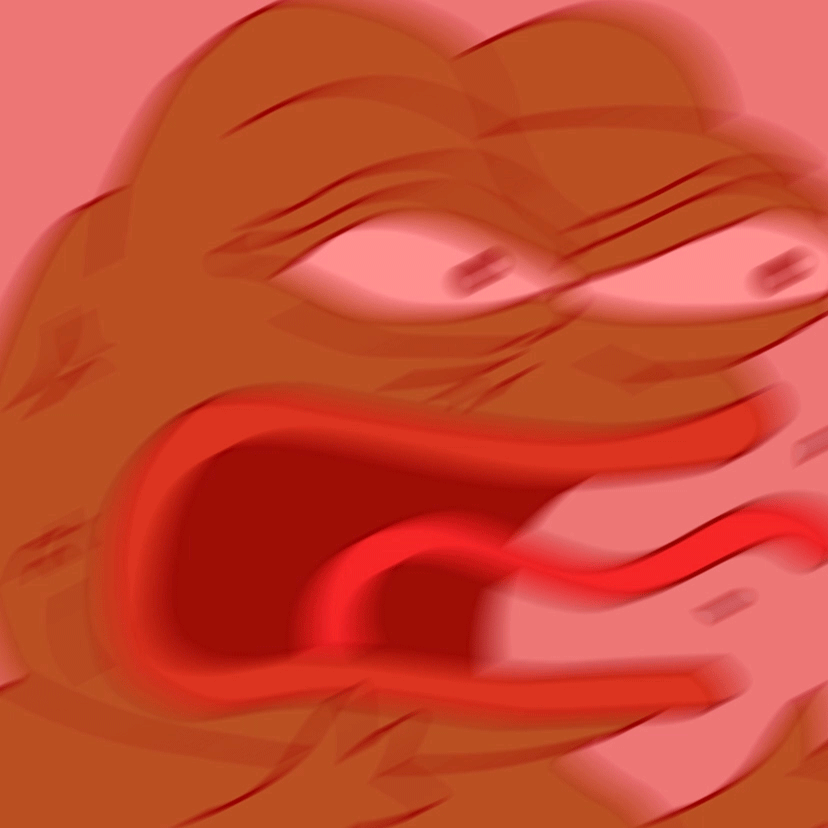

In [9]:
pepe = Image.open("./images/pepe.gif")
pepe

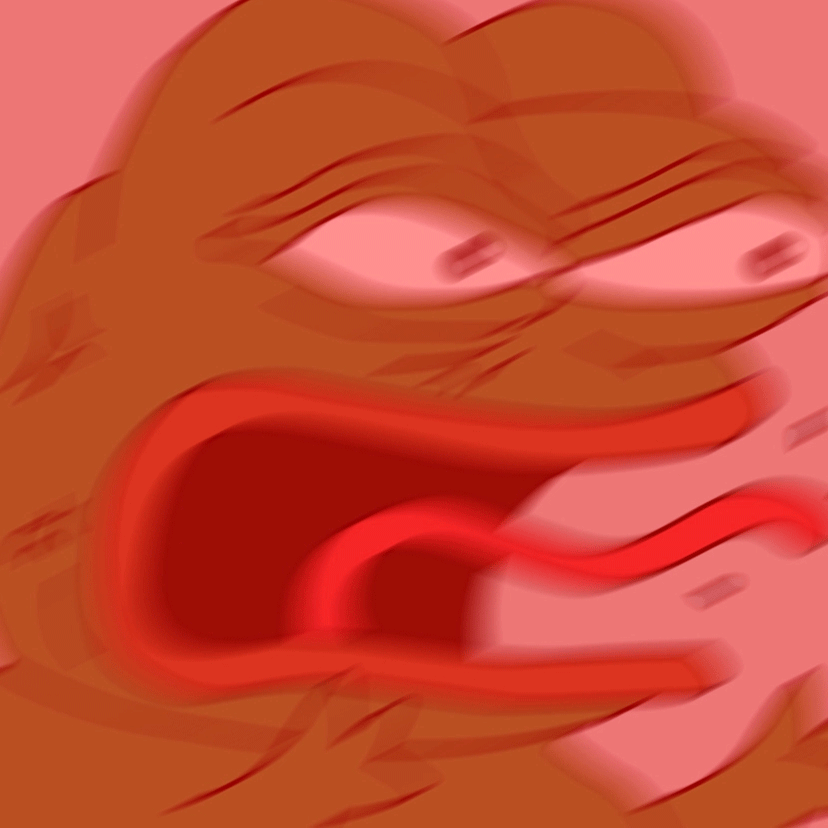

In [15]:
pepe.seek(4)


In [20]:
for frame in ImageSequence.Iterator(pepe):
    

1
1
1
1
1
1
